**GRIP - THE SPARKS FOUNDATION**

**NAME - G R GIRI SESHA SAI**

**TASK - PREDICTION USING DECISION TREE ALGORITHM.**


*   Create a Decision Tree Classifier and Visualize it graphically.




In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Importing data
data = pd.read_csv("/content/drive/MyDrive/GRIP TASKS/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Summarizing the dataset
data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**SUMMARY OF DATA**

*   The dataset has 150 entries.


*   The dataset has five features


*   There are no null values.

*   Numerical Features - Id, SepalLengthCm, SepalWidthCm,PetalLengthCm, PetalWidthCm
*   Categorical Features - Species



*   Species feature is the target variable.
*   It has three classifications - Iris-setosa,Iris-versicolor,
Iris-virginica

*   The dataset is equally distributed among the target variable.







**Decision Tree Classifier**

In [ ]:
# decision tree algorithm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# converting categorical variables into numerical one
le=LabelEncoder()
data['target'] = le.fit_transform(data['Species'])
data.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0




*   Id will be dropped in the analysis as it doesnot offer any information.
*   Species is also dropped as it is converted into numerical category.



In [ ]:
# Splitting the data into independent and dependent variables
x=data.drop(["Id","Species","target"],axis =1)
y=data["target"]

# Splitting the data into train,test data.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20)
print(data.shape)
print(x_train.shape)
print(x_test.shape)


(150, 7)
(120, 4)
(30, 4)


In [ ]:
# Standardising the values using standard scaler.
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# fitting our model
model =DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)


In [ ]:
# Comparing y_test,pred
ans = pd.DataFrame({'y_test': y_test, 'pred': pred})
print(ans)

     y_test  pred
54        1     1
6         0     0
100       2     2
55        1     1
108       2     2
74        1     1
114       2     2
90        1     1
149       2     2
67        1     1
140       2     2
75        1     1
3         0     0
56        1     1
57        1     1
129       2     1
138       2     2
72        1     1
120       2     2
87        1     1
25        0     0
136       2     2
98        1     1
68        1     1
12        0     0
91        1     1
115       2     2
111       2     2
61        1     1
42        0     0


**Visualizing decision tree graphically**

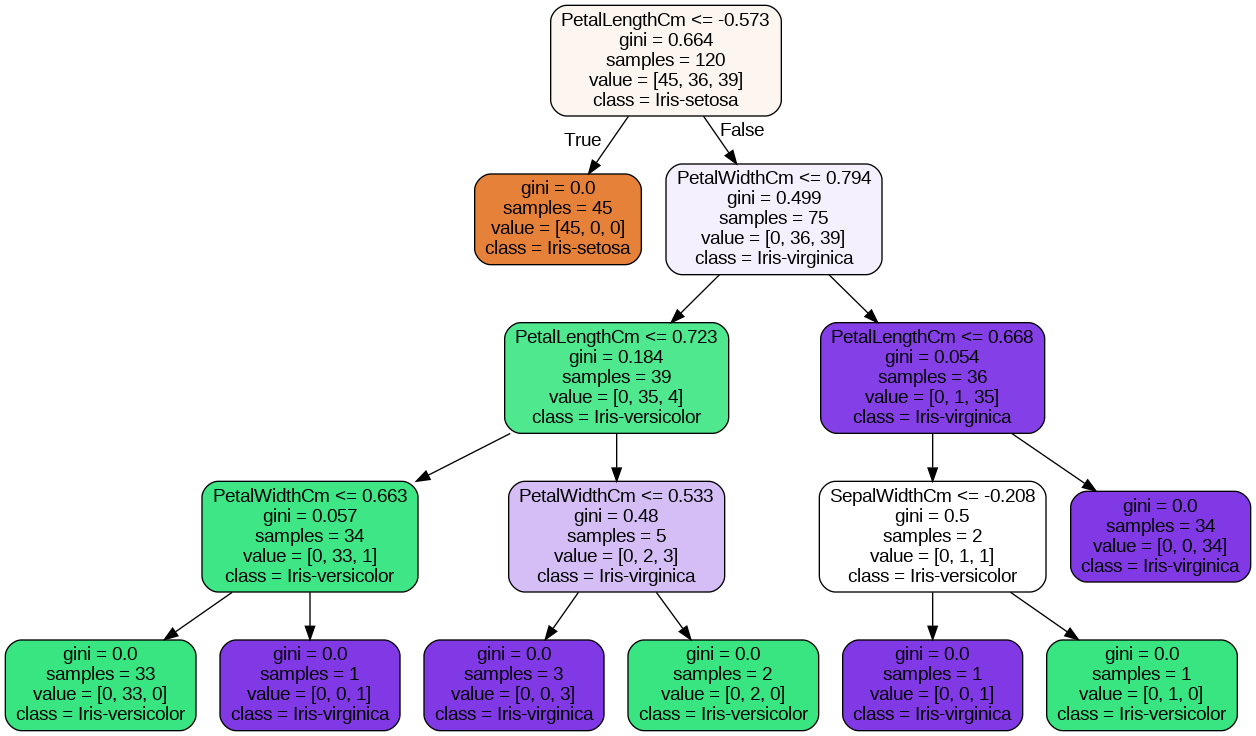

In [ ]:
# Import necessary libraries for graph viz
from sklearn.tree import  export_graphviz
from IPython.display import Image
import graphviz

# Export the decision tree to a dot file
export_graphviz(model, out_file="dectree.dot", feature_names=x.columns,
                class_names=data.Species.unique(), filled=True, rounded=True)

# Convert the dot file to a graph
with open("dectree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)

# Display the graph
graph.render("decision_tree", format="png", view=True, cleanup=True)
Image("decision_tree.png")


**New Data prediction**

In [ ]:
# Ask the user to input data
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Predict the class of the new data point
predicted_class = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])

# Display the predicted class
print("Predicted Class:", predicted_class[0])

Enter sepal length: 3.25
Enter sepal width: 4.5
Enter petal length: 5
Enter petal width: 3.6
Predicted Class: 2
